In [88]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

In [2]:
df = pd.read_csv('Turbine_Data.csv')
print(df.shape)
df.tail()

(118224, 22)


,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [4]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


<AxesSubplot:ylabel='Frequency'>

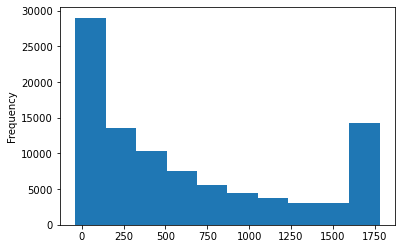

In [5]:
df.ActivePower.plot.hist()

C:\Users\Mohamed Ashraf\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ActivePower', ylabel='Density'>

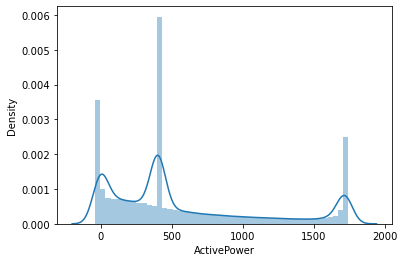

In [87]:
sns.distplot(df['ActivePower'])

# Data Preprocessing

In [6]:
#Parsing dates (first cloumn)

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [7]:
#Converting date to several numerical columns

#df['year'] = df['Date'].dt.year
#df['month'] = df['Date'].dt.month
#df['day'] = df['Date'].dt.day
#df['hour'] = df['Date'].dt.hour
#df['minute'] = df['Date'].dt.minute

df.drop('Date', axis=1, inplace= True)

In [8]:
# The two columns "Blade2PitchAngle" and "Blade3PitchAngle" are probably the same so i will check and remove one of them

if (df['Blade2PitchAngle'].equals(df['Blade3PitchAngle'])==True):
    df = df.drop('Blade3PitchAngle', axis=1) 

#The column "ControlBoxTemperature" has all null values so i will drop it
df.drop('ControlBoxTemperature', axis=1, inplace= True)

In [9]:
# Check the number of null values
df.isna().sum()

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [10]:
#filling missisng values with the median

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

In [11]:
df.isna().sum()

ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WTG                             0
WindDirection                   0
WindSpeed                       0
dtype: int64

In [12]:
#Checking "WTG" column categories

df_wtg = pd.get_dummies(df['WTG'])
print(df_wtg)


df.drop('WTG', axis=1, inplace=True)

        G01
0         1
1         1
2         1
3         1
4         1
...     ...
118219    1
118220    1
118221    1
118222    1
118223    1

[118224 rows x 1 columns]


In [13]:
df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,402.654893,28.340541,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
1,402.654893,28.340541,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
2,402.654893,28.340541,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
3,402.654893,28.340541,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
4,402.654893,28.340541,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   118224 non-null  float64
 1   AmbientTemperatue             118224 non-null  float64
 2   BearingShaftTemperature       118224 non-null  float64
 3   Blade1PitchAngle              118224 non-null  float64
 4   Blade2PitchAngle              118224 non-null  float64
 5   GearboxBearingTemperature     118224 non-null  float64
 6   GearboxOilTemperature         118224 non-null  float64
 7   GeneratorRPM                  118224 non-null  float64
 8   GeneratorWinding1Temperature  118224 non-null  float64
 9   GeneratorWinding2Temperature  118224 non-null  float64
 10  HubTemperature                118224 non-null  float64
 11  MainBoxTemperature            118224 non-null  float64
 12  NacellePosition               118224 non-nul

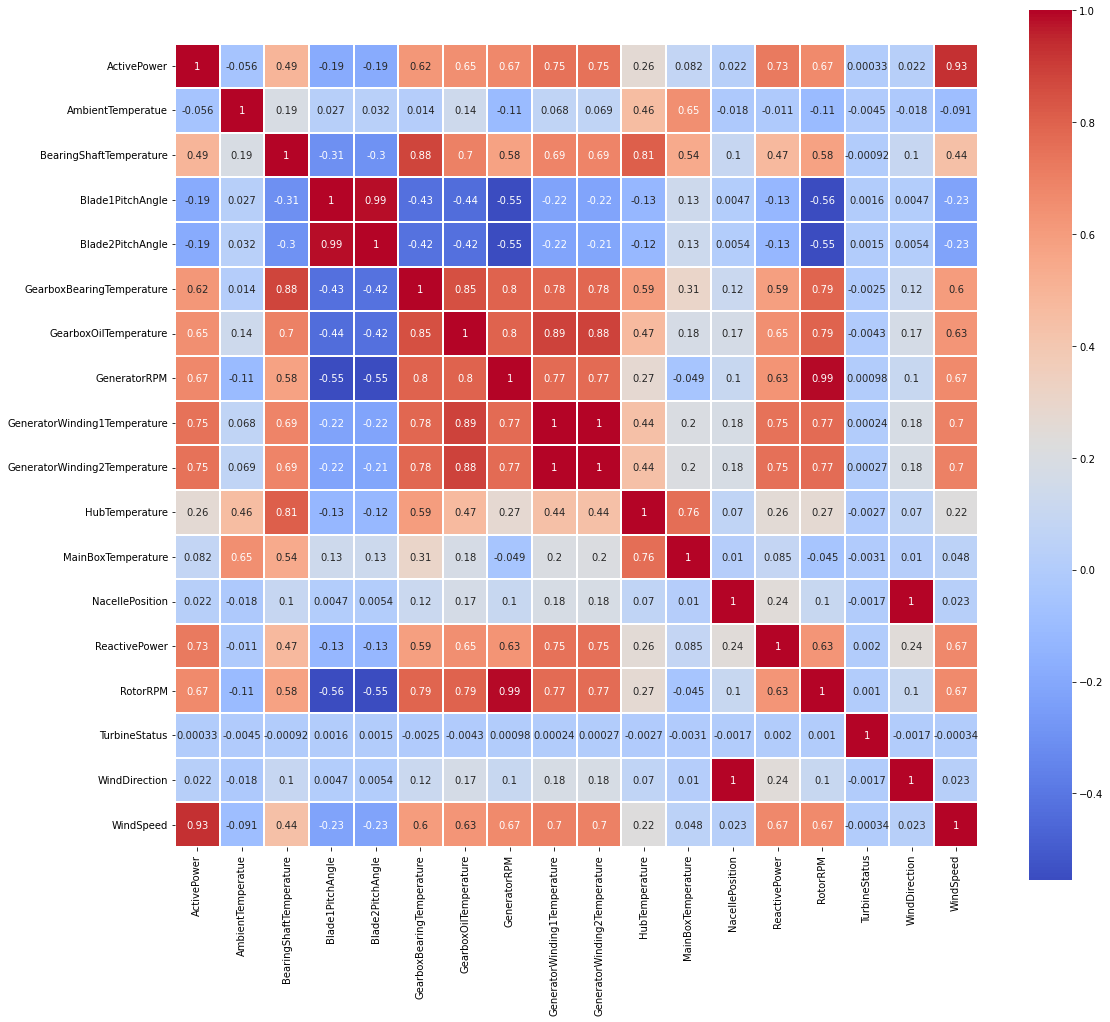

In [15]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),square=True,annot=True,linewidths=0.1,cmap="coolwarm")
plt.show()

# Scaling and Splitting Dataset

In [21]:
#X = df.drop(columns='ActivePower', axis=1)

X = df[['BearingShaftTemperature', 'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature', 'ReactivePower', 'RotorRPM', 'WindSpeed']]

Y = df['ActivePower']

In [22]:
sc = StandardScaler()

X = sc.fit_transform(X)



In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
print(X_train.shape)
print(X_test.shape)

(94579, 8)
(23645, 8)


# Creating ANN Model

In [74]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1152      
                                                                 
 dense_37 (Dense)            (None, 256)               33024     
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 256)               65792     
                                                                 
 dense_40 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [77]:
EPOCHS = 100
BS = 64

In [78]:
# early stopping callback

ES = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [79]:
H = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                    callbacks=[ES],
                    epochs=EPOCHS,
                    batch_size=BS,
                    verbose=1)

Epoch 1/100
1478/1478 [==============================] - 4s 2ms/step - loss: 21803.4219 - mae: 56.6004 - val_loss: 3352.0308 - val_mae: 25.5609
Epoch 2/100
1478/1478 [==============================] - 3s 2ms/step - loss: 3442.0039 - mae: 26.2981 - val_loss: 3081.3618 - val_mae: 23.8105
Epoch 3/100
1478/1478 [==============================] - 3s 2ms/step - loss: 3227.5193 - mae: 24.9984 - val_loss: 2665.7168 - val_mae: 18.3417
Epoch 4/100
1478/1478 [==============================] - 4s 2ms/step - loss: 3096.4607 - mae: 24.0584 - val_loss: 2825.5444 - val_mae: 20.4121
Epoch 5/100
1478/1478 [==============================] - 3s 2ms/step - loss: 2917.2427 - mae: 22.6132 - val_loss: 2426.5635 - val_mae: 16.8408
Epoch 6/100
1478/1478 [==============================] - 3s 2ms/step - loss: 2814.0435 - mae: 21.8209 - val_loss: 2816.7197 - val_mae: 26.4026
Epoch 7/100
1478/1478 [==============================] - 4s 2ms/step - loss: 2725.9612 - mae: 21.4680 - val_loss: 2237.3533 - val_mae: 16.627

Epoch 58/100
1478/1478 [==============================] - 4s 3ms/step - loss: 1332.3514 - mae: 13.8959 - val_loss: 1403.1046 - val_mae: 13.7039
Epoch 59/100
1478/1478 [==============================] - 4s 3ms/step - loss: 1364.6440 - mae: 14.0150 - val_loss: 1473.9209 - val_mae: 16.8716
Epoch 60/100
1478/1478 [==============================] - 4s 3ms/step - loss: 1340.3481 - mae: 14.0051 - val_loss: 1442.9154 - val_mae: 13.1223
Epoch 61/100
1478/1478 [==============================] - 4s 2ms/step - loss: 1339.9729 - mae: 13.8564 - val_loss: 1592.1205 - val_mae: 14.0024
Epoch 62/100
1478/1478 [==============================] - 4s 2ms/step - loss: 1368.1992 - mae: 14.0961 - val_loss: 1365.4236 - val_mae: 12.5437
Epoch 63/100
1478/1478 [==============================] - 4s 2ms/step - loss: 1357.3280 - mae: 13.9801 - val_loss: 1596.7656 - val_mae: 13.2806
Epoch 64/100
1478/1478 [==============================] - 4s 2ms/step - loss: 1325.5665 - mae: 13.5966 - val_loss: 1449.1627 - val_mae: 

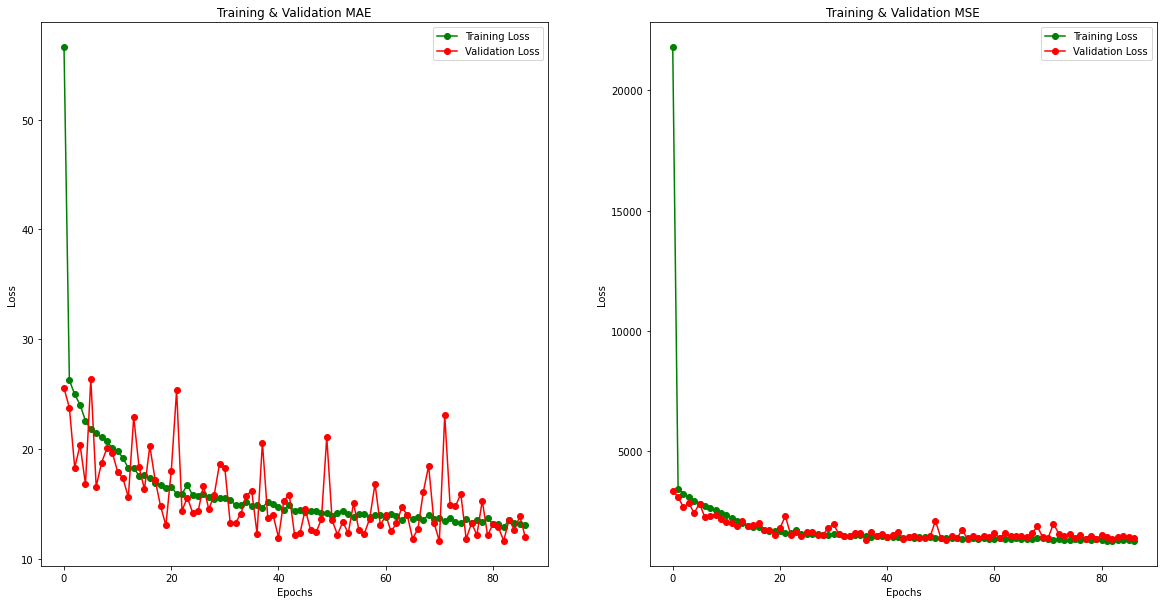

In [80]:
epochs = [i for i in range(87)]
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)


train_mae = H.history['mae']
train_loss = H.history['loss']
val_mae = H.history['val_mae']
val_loss = H.history['val_loss']

ax[0].plot(epochs , train_mae , 'go-' , label = 'Training Loss')
ax[0].plot(epochs , val_mae , 'ro-' , label = 'Validation Loss')
ax[0].set_title('Training & Validation MAE')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation MSE')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [81]:
test_loss = model.evaluate(X_test, Y_test)

739/739 [==============================] - 1s 1ms/step - loss: 1305.3173 - mae: 12.3571


In [90]:
model.save('Model_1_ANN_Wind.h5')

# Linear Regression

In [82]:
model2 = LinearRegression()

In [83]:
model2.fit(X_train, Y_train)

LinearRegression()

In [84]:
model2.score(X_train, Y_train)

0.8890595549441354

In [85]:
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(Y_test, model2.predict(X_test)))
print('Mean Absolute Error (MAE) : ', metrics.mean_absolute_error(Y_test, model2.predict(X_test)))

Mean Squared Error (MSE) :  32450.58616394656
Mean Absolute Error (MAE) :  120.32316405080944
